In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
#from sklearn.externals import joblib
import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut



#### Gerando datasets aleatórios
* Configurando numero de features=2
* configurando samples=300
* configurando numero de clusters e desvio padrao em relacao aos clusters

Fonte dos exemplos: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

(300, 2)


/home/silvio/.conda/envs/DL/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


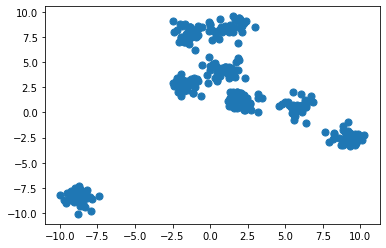

In [4]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_features=2, n_samples=300, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)

#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

### Executando algoritmo K-means
* número de clusters é obrigatório

### Na primeira execução utilizamos o número de clusters igual ao utilizado para criar a base de dados aleatória


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

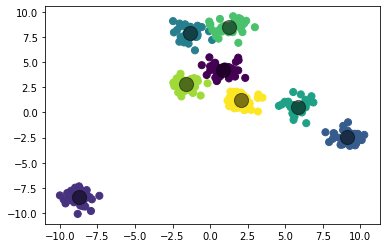

In [6]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

#print(kmeans.labels_)

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


### Na segunda execução utilizamos o número de clusters igual a metade da quantidade utilizada para criar a base de dados aleatória


In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

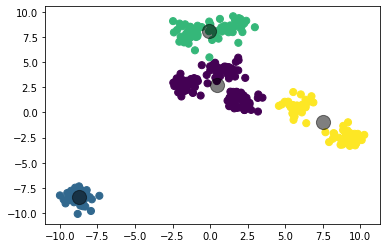

In [8]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

#print(kmeans.labels_)

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

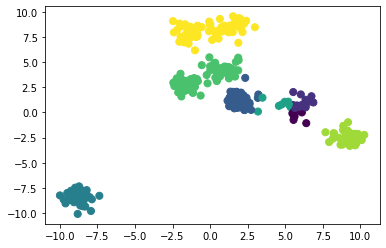

In [10]:
centers, labels = find_clusters(X, 8, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

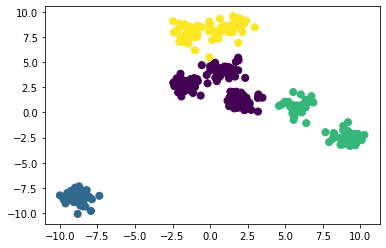

In [11]:
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Exemplo com diferentes formatos de cluster

#### Funcao make moons : monta cluster em formato semi circulo (visao 2d)

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

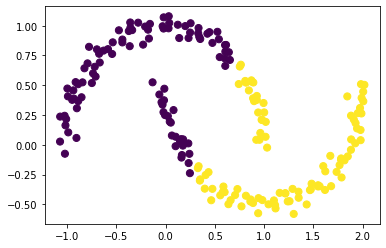

In [13]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

* SpectralClustering: uma versão do K-means que redimensiona os dados, para realizar agrupamento em conjuntos com fronteiras mais complexas de identificar



/home/silvio/.conda/envs/DL/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


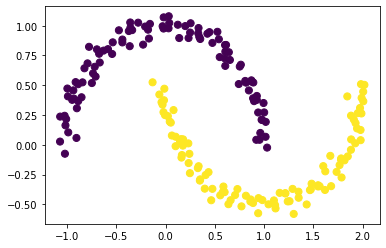

In [14]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

* A cada iteração de k-means deve acessar todos os pontos do conjunto de dados
* Isso pode tornar o algortimo lento à medida que o número de amostras cresce. 
* Quando o desempenho se torna uma barreira é possível utilizar o sklearn.cluster.MiniBatchKMeans, que recriar os centróides usando uma amostra dos dados

### Teste comparativo entre KMeans e MiniBatchKMeans
+ Usando 500000 amostras

(5000000, 2)


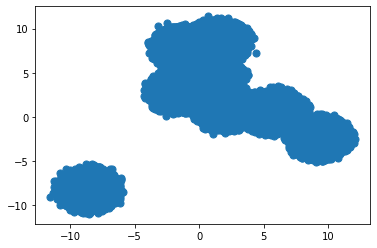

In [15]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_features=2, n_samples=5000000, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)

#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

## minibatch kmeans

* Funciona de maneira semelhante ao algoritmo k-means, porem utiliza um subset aleatorio da base em cada iteração e nao a base completa como no kmeans

* Minibatch kmeans: versão do kmeans apropriada para bases maiores, apresenta melhor desempenho, porém não atinge a melhor configuração necessariamente

* Tempo de execução do MiniBatchKMeans nesse servidor é menor quando comparado com KMeans

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from datetime import datetime
now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("Current Time =", current_time)

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("KMeans Current Time =", current_time)


now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("Current Time =", current_time)

kmeans = MiniBatchKMeans(n_clusters=8)
kmeans.fit(X)

now = datetime.now()
current_time = now. strftime("%H:%M:%S")
print("MiniBatchKMeans Current Time =", current_time)

#print("MiniBatchKMeans Tempo: %0.2f segundos" % ((time() - t)))
    
y_kmeans = kmeans.predict(X)

Current Time = 10:27:52
KMeans Current Time = 10:28:18
Current Time = 10:28:18
MiniBatchKMeans Current Time = 10:28:30


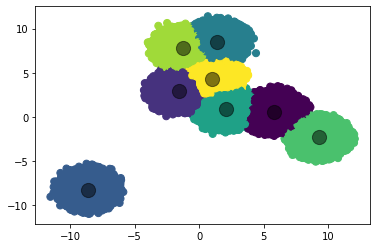

In [17]:
# cmap = colormap
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

#print(kmeans.labels_)

#plotando no mesmo gráfico anterior os centros dos clusters identificados pelo K-means
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Escolhendo valor de K
* Fatores definidos a priori: 
    * Ex: X e Y representa Lat/Log e deseja identificar dois grupos para encontrar pontos mais próximos entre si em cada grupo
* Valor de K que cria grupos muito bem definidos em relação as características       

### Uma forma de escolher o melhor valor de K, é o método de Elbow
* Nesse método é utilizado a porcentagem de variancia em função do número de clusters

* Essa técnica fornece uma representação gráfica sucinta de quão bem cada objeto foi classificado.
    * Para isso pode ser usado a métrica  silhouette que é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). 
    * O valor varia de -1 a +1, quanto mais alto maior a coesão
    * Ou pode-se utilizar também  métrica de distância, (Euclidiana, Manhattan, etc)

(300, 2)


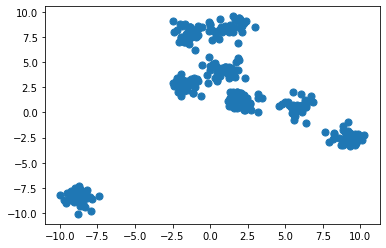

In [18]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_features=2, n_samples=300, centers=8, cluster_std=0.60, random_state=0)

print(X.shape)

#Plotando gráfico considerando as duas dimensoes de X, S indica o tamanho do ponto no gráfico
plt.scatter(X[:, 0], X[:, 1], s=50);

### Método de Elbow comparando 
* distancia Euclidiana 
* Silhouette

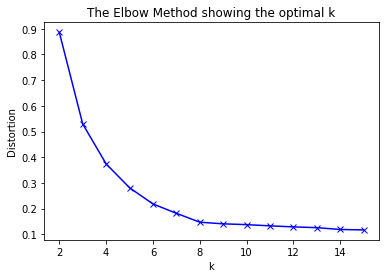

In [19]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []

K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'mahalanobis'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

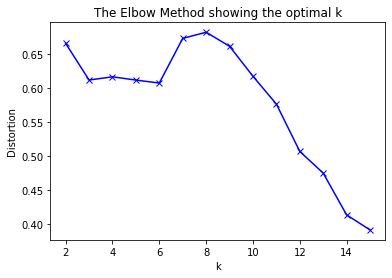

In [20]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# k means determine k
silhouette = []
K = range(2,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    silhouette.append(silhouette_score(X, kmeanModel.labels_))
    
# Plot the elbow
#plt.plot(K, distortions, 'bx-')
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


### Interpretação de resultados Kmeans
* O que torna um cluster diferente dos outros?
* Quais são os clusters semelhantes entre si?
    
* O Arquivo california-election-2016.csv mostra uma pesquisa com 17 perguntas (sim/nao)

    * legalização da maconha
    * Obrigatoriedade de atores em filmes adultos usarem preservativos
    * dificultar a compra de armas de fogo etc.


* Cada linha representa cada município da Califórnia (58)

* Há uma coluna que indica qual partido (republicano ou democrata) do candidato presidencial (Trump ou Hilary) cada condado apoiou em maioria

Fonte: https://blog.exploratory.io/visualizing-k-means-clustering-results-to-understand-the-characteristics-of-clusters-better-b0226fb3dd10

### Abaixo carregamos o arquivo e codificamos variaveis categoricas

In [22]:
le = preprocessing.LabelEncoder()
df = pd.read_csv('2016 California Election Data.csv')

df['PARTY_NAME-cat']=le.fit_transform(df['PARTY_NAME'])
X=df.drop(['COUNTY_NAME','PARTY_NAME'], axis=1)

X.shape

(58, 18)

### Em seguida rodamos Kmeans com 3 clusters

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape
print(clusters.shape)
print(clusters)

(58,)
[1 1 0 0 0 0 1 0 0 2 0 1 2 0 0 0 2 0 1 0 1 0 1 2 0 2 1 1 2 2 0 0 2 2 2 2 2
 1 2 2 1 1 1 1 0 0 0 2 1 2 0 0 0 0 0 2 1 0]


### Incluimos o cluster de cada linha na base

In [24]:
df['clusters']=clusters

In [25]:
print(df.describe())
print(df.columns)

       Adult Film Condom Requirements  Ban on Single-use Plastic Bags  \
count                       58.000000                       58.000000   
mean                         0.412685                        0.480511   
std                          0.062962                        0.127601   
min                          0.314305                        0.272123   
25%                          0.371605                        0.388954   
50%                          0.410934                        0.437037   
75%                          0.446188                        0.592199   
max                          0.607946                        0.762174   

       Carryout Bag Charges  Cigarette Tax  \
count             58.000000      58.000000   
mean               0.407685       0.565337   
std                0.073335       0.107098   
min                0.237192       0.369979   
25%                0.345127       0.476283   
50%                0.413744       0.563659   
75%                0

### A partir daí, é possível fazer diversas análise exploratórias

* Abaixo é feita uma comparação entre partido e posicionamento quanto a legalização da Maconha em cada cluster:

In [26]:
c0 = df.loc[df['clusters']==0]
print(c0['PARTY_NAME-cat'].unique())
print(c0['Marijuana Legalization'].mean())
c1 = df.loc[df['clusters']==1]
print(c1['PARTY_NAME-cat'].unique())
print(c1['Marijuana Legalization'].mean())
c2 = df.loc[df['clusters']==2]
print(c2['PARTY_NAME-cat'].unique())
print(c2['Marijuana Legalization'].mean())

[1]
0.4886969647185622
[0]
0.6259474035435743
[0]
0.5381978858914279


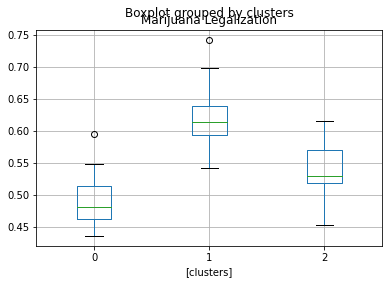

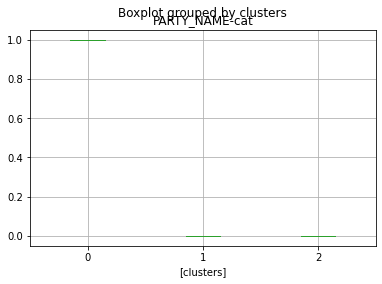

In [27]:
df.boxplot(column=['Marijuana Legalization'], by=['clusters'])
df.boxplot(column=['PARTY_NAME-cat'], by=['clusters'])

### Exemplo com Mnist
* Usando aprendizagem não-supervisionada para descobrir relação entre atributos, que definam as classes anotadas
    * Uso de aprendizagem não-supervionada como opção a classificação supervisionada
* Exemplo: classificação na Base Mnist
    Separando K-means em 10 clusters, de forma que o algortimo crie um cluster para cada número

* Modelo Kmeans usando 10 cluster ( mesmo número de dígitos na base)

# carregando digitos

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

# criando modelo

In [ ]:

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

# mostrando centroides

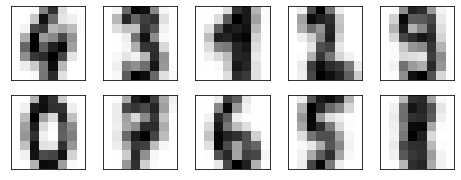

In [42]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

0.7952142459654981

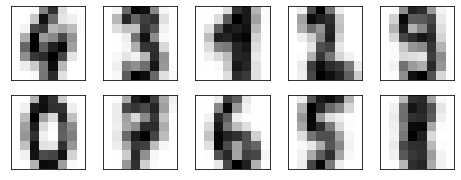

In [40]:
 
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


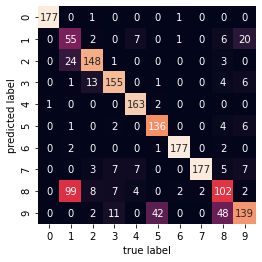

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');